## Поглядим на структуру датасета, поищем ошибки в файлах и покажем как связаны переменные между собой

Кейс 2: Рекомендации товаров в электронной коммерции

    Цель: Предсказать, какие товары предложить пользователю интернет-магазина.
    Основные задачи: Анализ событий и характеристик товаров, выбор метрик, построение модели рекомендаций, внедрение модели в виде веб-сервиса, мониторинг и обновление модели.
    Данные: Ссылка на датасет

Если вы выбрали кейс 2: Рекомендация товаров в электронной коммерции
На самом деле, именно онлайн-коммерция и дала толчок задачам рекомендаций. Один из первых и самых известных примеров коммерческой рекомендательной системы — Amazon.
В задачах, связанных с электронной коммерцией, выбор метрик зависит от целей компании:

    Если это получение прибыли, то от рекомендаций будут требовать именно прирост прибыли.
    Если это рост выручки, то соответствующие показатели эффективности будут ожидаться и от рекомендаций. В ритейле этот показатель называется GVM.
    Если это рост компании, то фокус сместиться на максимизацию покупок, кликов и просмотров — без привязки к деньгам.
    Если это рост денежных показателей, но через встроенную рекламу, то максимизировать нужно глубину скролла ленты рекомендаций.

В рамках нашего проекта вы будете ориентироваться на добавления товаров в корзину. Это не значит, что из выборки нужно выкидывать другие позитивные действия (транзакции), — просто некоторые действия (покупки) хорошо подсвечивают, что нравится пользователю, либо предоставляют механизм фильтрации (человек купил холодильник, рекомендовать ему этот товар больше не имеет смысла).
В таблице ниже мы расписали шаги и ожидаемые результаты. 

# category_tree.csv
| parent_category(Родительская категория) | child_category(Дочерняя категория) |
|-----------------|----------------|


# events.csv
| timestamp(Временная метка события) | visitorid( Идентификатор посетителя) | event(Тип события (просмотр, добавление в корзину, покупка)) | itemid(Идентификатор товара) | transactionid(Идентификатор транзакции (покупки), null если событие не связано с покупкой) |
|-----------|-----------|-------|--------|----------------|


# item_properties.csv
| timestamp(Временная метка добавления свойства) | itemid(Идентификатор товара) | property(Свойство товара (например, бренд, размер экрана)) | value(Значение свойства) |
|-----------|--------|----------|-------|

In [1]:
import pandas as pd


df_category_tree = pd.read_csv("data/category_tree.csv")
df_events = pd.read_csv("data/events.csv")
df_item_properties_part1 = pd.read_csv("data/item_properties_part1.csv")
df_item_properties_part2 = pd.read_csv("data/item_properties_part2.csv")

In [2]:
df_category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [3]:
df_category_tree.query("parentid % 1 == 0 and not parentid.isna()")

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [4]:
df_category_tree[df_category_tree["categoryid"] == 0]

,categoryid,parentid
535,0,605.0


In [5]:
df_category_tree[df_category_tree["categoryid"] == -1]

,categoryid,parentid


In [6]:
df_category_tree["parentid"] = df_category_tree["parentid"].fillna(-1).astype("int")

In [7]:
df_category_tree[df_category_tree["parentid"] == -1]

,categoryid,parentid
5,231,-1
589,791,-1
861,1490,-1
939,431,-1
1111,755,-1
1142,378,-1
1208,1579,-1
1211,1394,-1
1322,659,-1
1329,1057,-1


In [8]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [9]:
df_events

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [10]:
df_item_properties_part1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [11]:
df_item_properties_part2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [12]:
sd1 = set(df_item_properties_part1["itemid"].unique())

sd2 = set(df_item_properties_part2["itemid"].unique())

print(len(sd1))

sd_div1 = sd1.difference(sd2)

sd_div2 = sd2.difference(sd1)

print(sd_div1, sd_div2)

417053
set() set()


### part_1 и part_2 содержат одинаковый набор itemid

In [13]:
df_item_properties_all = pd.concat([df_item_properties_part1, df_item_properties_part2])

del df_item_properties_part1, df_item_properties_part2, sd1, sd2, sd_div1, sd_div2

df_item_properties_all.sort_values(by=["timestamp", "itemid"], inplace=True)

In [14]:
df_item_properties_all.query("property == '663'")["itemid"].nunique()

21563

In [15]:
df_item_properties_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20275902 entries, 484093 to 4744976
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 773.5+ MB


[364.0, 888.0, 776.0, 917.0, 1256484.0, 891317.0, 'I', 'fi', 'ity', 888166.0, 891317.0, 'I', 'fi', 'ity', 88645.0]
[458.0, 888.0, 364.0, 776.0, 769062.0, 42654.0, 'I', 'fi', 'ity', 960344.0, 647808.0]

In [16]:
import numpy as np
import re


def value_str_to_list(x):
    if pd.isna(x):
        return []

    x = str(x).replace("n", " ").strip()
    parts = x.split()

    clean = []
    for p in parts:
        try:
            if re.fullmatch("^[+-]?\d+(?:\.\d+)?[ ]?$", p):
                clean.append(float(p))
            else:
                clean.append(int(p))
        except:
            continue

    return clean


df_item_properties_all["value"] = df_item_properties_all["value"].apply(
    lambda x: value_str_to_list(x)
)


df_item_properties_all.query("itemid == 132256 ")

,timestamp,itemid,property,value
12285,1439694000000,132256,663,"[1297729.0, 156.0, 606827.0]"
902677,1439694000000,132256,452,"[992862.0, 951748.0, 1011636.0]"
1029671,1439694000000,132256,771,"[15.6, 190776.0, 639502.0, 32.4, 190776.0]"
1104309,1439694000000,132256,602,"[618514.0, 980588.0]"
2317933,1439694000000,132256,566,"[309.0, 424566.0]"
2544841,1439694000000,132256,888,"[5135.0, 813443.0, 678736.0, 149367.0, 992862...."
3557398,1439694000000,132256,619,"[6000.0, 1187104.0]"
3830202,1439694000000,132256,227,[1037891.0]
4303443,1439694000000,132256,681,"[814297.0, 670753.0, 97.2]"
5290560,1439694000000,132256,698,[1037891.0]


In [17]:
df_item_properties_all.query("itemid == 132256 and property == '888'")

,timestamp,itemid,property,value
2544841,1439694000000,132256,888,"[5135.0, 813443.0, 678736.0, 149367.0, 992862...."
3141190,1440298800000,132256,888,"[5135.0, 813443.0, 678736.0, 149367.0, 992862...."
2942407,1440903600000,132256,888,"[5135.0, 813443.0, 678736.0, 149367.0, 992862...."
2743624,1441508400000,132256,888,"[5135.0, 813443.0, 678736.0, 149367.0, 992862...."
3339973,1442113200000,132256,888,"[5135.0, 813443.0, 678736.0, 149367.0, 992862...."


In [18]:
df_item_properties_all["id"] = np.arange(len(df_item_properties_all))

df_item_properties_all

,timestamp,itemid,property,value,id
484093,1431226800000,0,283,"[66094.0, 372274.0, 478989.0]",0
2604501,1431226800000,0,6,"[1152934.0, 1238769.0]",1
10592972,1431226800000,0,159,[519769.0],2
10958695,1431226800000,0,678,[372274.0],3
431791,1431226800000,0,790,[91200.0],4
...,...,...,...,...,...
2238896,1442113200000,466864,790,[111840.0],20275897
5763096,1442113200000,466864,813,"[1148082.0, 353870.0, 1262739.0]",20275898
1885430,1442113200000,466864,888,"[1262739.0, 205682.0, 1050016.0, 1154859.0]",20275899
3202826,1442113200000,466864,available,[0.0],20275900


In [19]:
filtered = df_item_properties_all[~df_item_properties_all["property"].str.isdigit()]

filtered["property"].unique()

array(['categoryid', 'available'], dtype=object)

In [20]:
filtered.columns

Index(['timestamp', 'itemid', 'property', 'value', 'id'], dtype='object')

In [21]:
groupby_items = (
    filtered[["timestamp", "itemid", "property"]]
    .groupby(by=["timestamp", "itemid"])
    .agg("count")
    .reset_index()
)

groupby_items

groupby_items_mean_property = (
    groupby_items[["timestamp", "property"]]
    .groupby(by="timestamp")
    .agg("mean")
    .reset_index()
)
groupby_items_mean_property

,timestamp,property
0,1431226800000,1.382119
1,1431831600000,1.081619
2,1432436400000,1.069602
3,1433041200000,1.142796
4,1433646000000,1.082817
5,1434250800000,1.054729
6,1435460400000,1.143162
7,1436065200000,1.040379
8,1436670000000,1.050190
9,1437274800000,1.051057


Попробуем сделать так:
-property со значением categoryid ="categoryid","available" закинуть в отдельные столбцы
-property со значением categoryid != "categoryid","available" объединить списки 

In [22]:
cat_avail = (
    filtered.pivot(index=["timestamp", "itemid"], columns="property", values="value")
    .reset_index()
    .rename_axis(None, axis=1)  # убираем лишнюю колонку‑индекс
)

cat_avail

cat_avail.loc[~cat_avail["available"].isnull(), "available"] = cat_avail.loc[
    ~cat_avail["available"].isnull(), "available"
].apply(lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else x)

cat_avail.loc[~cat_avail["categoryid"].isnull(), "categoryid"] = cat_avail.loc[
    ~cat_avail["categoryid"].isnull(), "categoryid"
].apply(lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else x)

cat_avail

,timestamp,itemid,available,categoryid
0,1431226800000,0,NaN,209
1,1431226800000,1,1,1114
2,1431226800000,2,NaN,1305
3,1431226800000,3,0,NaN
4,1431226800000,6,1,1091
...,...,...,...,...
2040159,1442113200000,466848,1,NaN
2040160,1442113200000,466853,0,NaN
2040161,1442113200000,466858,1,NaN
2040162,1442113200000,466861,0,NaN


In [23]:
cat_avail.query("itemid == 3")

,timestamp,itemid,available,categoryid
3,1431226800000,3,0,NaN
546814,1433041200000,3,NaN,1171


In [24]:
def fast_list_concat(series):
    result = []
    for item in series:
        if isinstance(item, list):
            result.extend(item)
        else:
            result.append(item)
    return result


def agg_values_to_list(df_item_properties_all):
    mask = ~df_item_properties_all["property"].isin(["categoryid", "available"])
    others = df_item_properties_all.loc[
        mask, ["timestamp", "itemid", "property", "value"]
    ].copy()

    del mask

    others["property"] = others["property"].astype("float32")
    others["itemid"] = others["itemid"].astype("int32")
    others["timestamp"] = others["timestamp"].astype("int64")
    others_grouped = (
        others.groupby(["timestamp", "itemid", "property"], sort=False)
        .agg({"value": fast_list_concat})
        .reset_index()
    )

    return others_grouped


others = agg_values_to_list(df_item_properties_all)

In [25]:
others

,timestamp,itemid,property,value
0,1431226800000,0,283.0,"[66094.0, 372274.0, 478989.0]"
1,1431226800000,0,6.0,"[1152934.0, 1238769.0]"
2,1431226800000,0,159.0,[519769.0]
3,1431226800000,0,678.0,[372274.0]
4,1431226800000,0,790.0,[91200.0]
...,...,...,...,...
17984044,1442113200000,466861,790.0,[377520.0]
17984045,1442113200000,466864,790.0,[111840.0]
17984046,1442113200000,466864,813.0,"[1148082.0, 353870.0, 1262739.0]"
17984047,1442113200000,466864,888.0,"[1262739.0, 205682.0, 1050016.0, 1154859.0]"


In [26]:
others.query("itemid == 3")

,timestamp,itemid,property,value
17,1431226800000,3,678.0,[327918.0]
18,1431226800000,3,283.0,"[138228.0, 150169.0, 1182824.0, 327918.0, 2614..."
19,1431226800000,3,888.0,[261419.0]
20,1431226800000,3,764.0,[1285872.0]
21,1431226800000,3,790.0,[1560.0]
22,1431226800000,3,6.0,[1305767.0]
2566181,1431831600000,3,283.0,"[138228.0, 150169.0, 1182824.0, 327918.0, 2614..."
2566182,1431831600000,3,562.0,[769062.0]
2566183,1431831600000,3,604.0,[769062.0]
2566184,1431831600000,3,364.0,[354388.0]


In [27]:
df_item_properties_all = others.merge(
    cat_avail,
    on=["timestamp", "itemid"],
    how="inner",
)

In [28]:
del cat_avail, others, filtered, groupby_items, groupby_items_mean_property

In [29]:
df_item_properties_all

,timestamp,itemid,property,value,available,categoryid
0,1431226800000,0,283.0,"[66094.0, 372274.0, 478989.0]",NaN,209
1,1431226800000,0,6.0,"[1152934.0, 1238769.0]",NaN,209
2,1431226800000,0,159.0,[519769.0],NaN,209
3,1431226800000,0,678.0,[372274.0],NaN,209
4,1431226800000,0,790.0,[91200.0],NaN,209
...,...,...,...,...,...,...
7430128,1442113200000,466858,790.0,[37200.0],1,NaN
7430129,1442113200000,466861,790.0,[377520.0],0,NaN
7430130,1442113200000,466864,790.0,[111840.0],0,NaN
7430131,1442113200000,466864,813.0,"[1148082.0, 353870.0, 1262739.0]",0,NaN


In [30]:
df_item_properties_all.query("itemid == 3")

,timestamp,itemid,property,value,available,categoryid
17,1431226800000,3,678.0,[327918.0],0,NaN
18,1431226800000,3,283.0,"[138228.0, 150169.0, 1182824.0, 327918.0, 2614...",0,NaN
19,1431226800000,3,888.0,[261419.0],0,NaN
20,1431226800000,3,764.0,[1285872.0],0,NaN
21,1431226800000,3,790.0,[1560.0],0,NaN
22,1431226800000,3,6.0,[1305767.0],0,NaN
2843499,1433041200000,3,283.0,"[138228.0, 150169.0, 1182824.0, 327918.0, 2614...",NaN,1171
2843500,1433041200000,3,917.0,"[261419.0, 829653.0]",NaN,1171
2843501,1433041200000,3,33.0,"[279887.0, 421694.0]",NaN,1171
2843502,1433041200000,3,698.0,[1305767.0],NaN,1171


АНАЛИЗ VALUE

In [31]:
from EDA_utils import analyze_value_lists


analyze_value_lists(df_item_properties_all)

АНАЛИЗ ПОЛЯ VALUE

 1.типы данных и общая длинна:
types value:
   <class 'list'>: 7,430,133 (100.0%)
rows with list: 7430133

 2.статистика длин списков:
Статистика длин:
   count: 7430133.0
   mean: 2.579076579113725
   std: 5.300879059827489
   min: 0.0
   25%: 1.0
   50%: 1.0
   75%: 2.0
   max: 59.0
топ10 самых частых длин:
0: 15
1: 5,023,400
2: 1,031,256
3: 474,071
4: 270,081
5: 167,850
6: 79,030
7: 48,444
8: 32,630
9: 26,622

 3.какие значения внутри?:
топ10 частых свойств:
            count   mean    std  min  max
property                                 
790.0     1260868   1.00   0.00    1    1
888.0     1008166   4.25   6.01    0   46
283.0      287989  20.10  14.30    1   59
776.0      287049   1.00   0.00    1    1
6.0        272111   1.77   1.04    1   44
364.0      267821   1.00   0.00    1    1
112.0      266729   1.00   0.00    1    1
678.0      264021   1.17   0.41    1    5
917.0      253218   1.52   1.08    0   23
764.0      239436   1.00   0.00    1    1

 4.значени

/home/yoh/project/mle-pr-final/.venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


статистика всех значений:
   count: 19162882.0
   mean: 1.5655265217279947e+207
   std: inf
   min: -6034344.0
   25%: 165937.5
   50%: 610340.0
   75%: 978861.0
   max: 3e+214


In [32]:
def create_value_stats(value_list):
    if len(value_list) == 0:
        return {
            "value_count": 0,
            "value_first": -1,  # дефолт для пустого списка
            "value_last": -1,
            "value_min": -1,
            "value_max": -1,
            "value_mean": -1.0,
            "value_std": 0.0,
        }

    result = {
        "value_count": len(value_list),
        "value_first": value_list[0],
        "value_last": value_list[-1],
        "value_min": min(value_list),
        "value_max": max(value_list),
        "value_mean": np.mean(value_list),
        "value_std": np.std(value_list) if len(value_list) > 1 else 0.0,
    }

    return result


def extract_value_statistics(df_properties):
    value_stats = df_properties["value"].apply(create_value_stats)

    stats_df = pd.json_normalize(value_stats)

    df_without_value = df_properties.drop("value", axis=1)
    result_df = pd.concat([df_without_value.reset_index(drop=True), stats_df], axis=1)

    return result_df


df_item_properties_all = extract_value_statistics(df_item_properties_all)

/home/yoh/project/mle-pr-final/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [33]:
df_item_properties_all

,timestamp,itemid,property,available,categoryid,value_count,value_first,value_last,value_min,value_max,value_mean,value_std
0,1431226800000,0,283.0,NaN,209,3,66094.0,478989.0,66094.0,478989.0,3.057857e+05,174997.322091
1,1431226800000,0,6.0,NaN,209,2,1152934.0,1238769.0,1152934.0,1238769.0,1.195852e+06,42917.500000
2,1431226800000,0,159.0,NaN,209,1,519769.0,519769.0,519769.0,519769.0,5.197690e+05,0.000000
3,1431226800000,0,678.0,NaN,209,1,372274.0,372274.0,372274.0,372274.0,3.722740e+05,0.000000
4,1431226800000,0,790.0,NaN,209,1,91200.0,91200.0,91200.0,91200.0,9.120000e+04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
7430128,1442113200000,466858,790.0,1,NaN,1,37200.0,37200.0,37200.0,37200.0,3.720000e+04,0.000000
7430129,1442113200000,466861,790.0,0,NaN,1,377520.0,377520.0,377520.0,377520.0,3.775200e+05,0.000000
7430130,1442113200000,466864,790.0,0,NaN,1,111840.0,111840.0,111840.0,111840.0,1.118400e+05,0.000000
7430131,1442113200000,466864,813.0,0,NaN,3,1148082.0,1262739.0,353870.0,1262739.0,9.215637e+05,404139.935577


In [34]:
for item in df_item_properties_all:
    print(item, df_item_properties_all[item].isna().sum())

timestamp 0
itemid 0
property 0
available 2005141
categoryid 4015461
value_count 0
value_first 0
value_last 0
value_min 0
value_max 0
value_mean 0
value_std 0


Проанализируем available

ДЕТАЛЬНЫЙ АНАЛИЗ ПОЛЯ AVAILABLE
Базовая статистика:
total_item_days: 1,909,324
unique_items: 416,476
available_coverage: 75.3%
items_with_changes_available: 66,214 (15.9%)


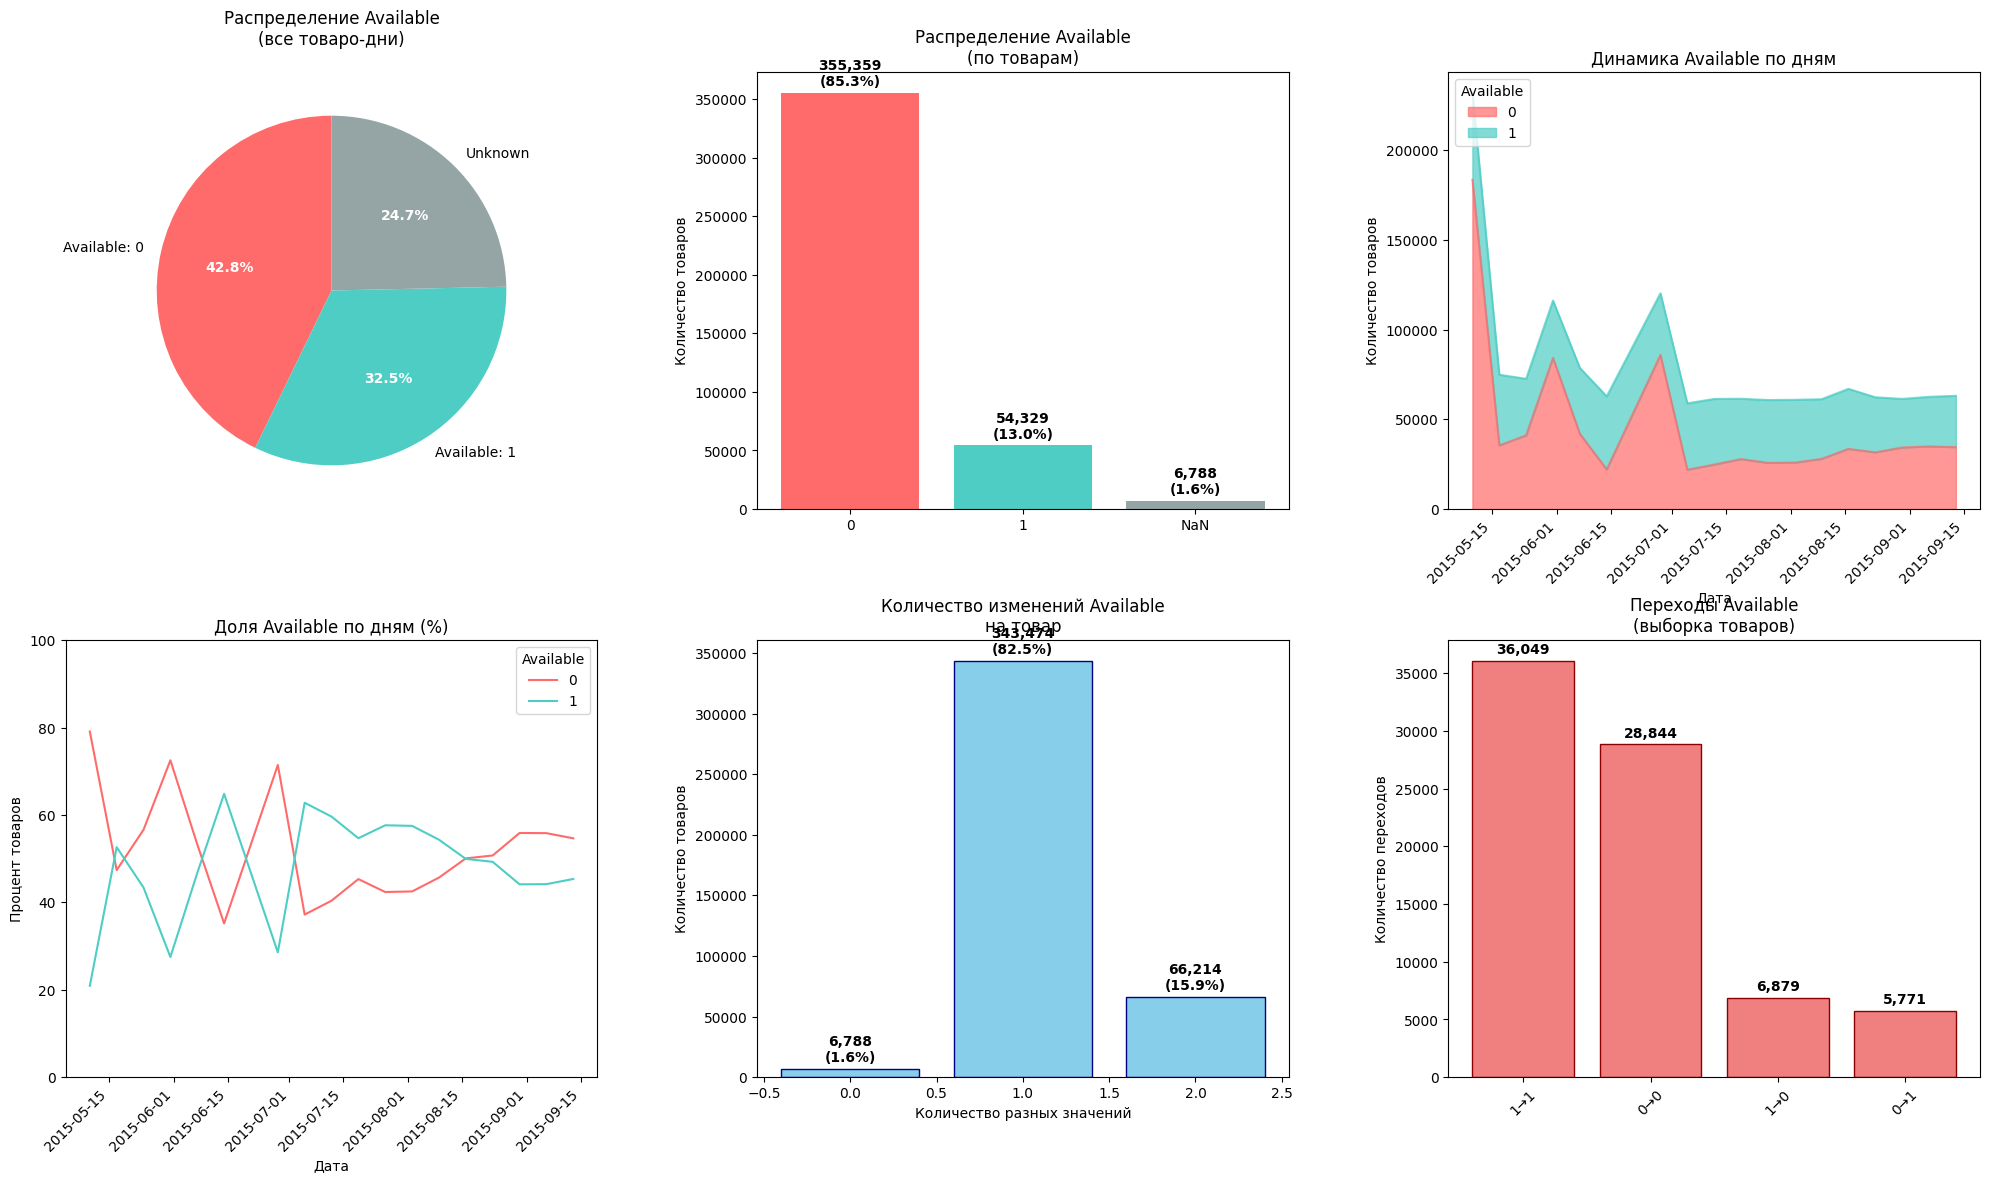

In [35]:
from pathlib import Path
from datetime import datetime
from EDA_utils import analyze_available_field


stats, fig = analyze_available_field(df_item_properties_all)

In [36]:
pth = Path("EDA_res").resolve()
pth.mkdir(exist_ok=True)
f_name = f"item_props_available_{datetime.now().date().__str__()}"
fig.savefig(str(pth / (f_name + ".png")))

pd.DataFrame.from_dict(stats).to_json(pth / (f_name + ".json"))

Проанализируем categoryid

ДЕТАЛЬНЫЙ АНАЛИЗ ПОЛЯ CATEGORYID
total_item_days: 1,909,324
unique_items: 416,476
unique_categories: 1,241
categories_coverage: 37.7%
items_with_changes_categoryid: 20,399 (4.9%)
Категорий в дереве: 1,669
Пересечение: 1,211
Категории-сироты: 30


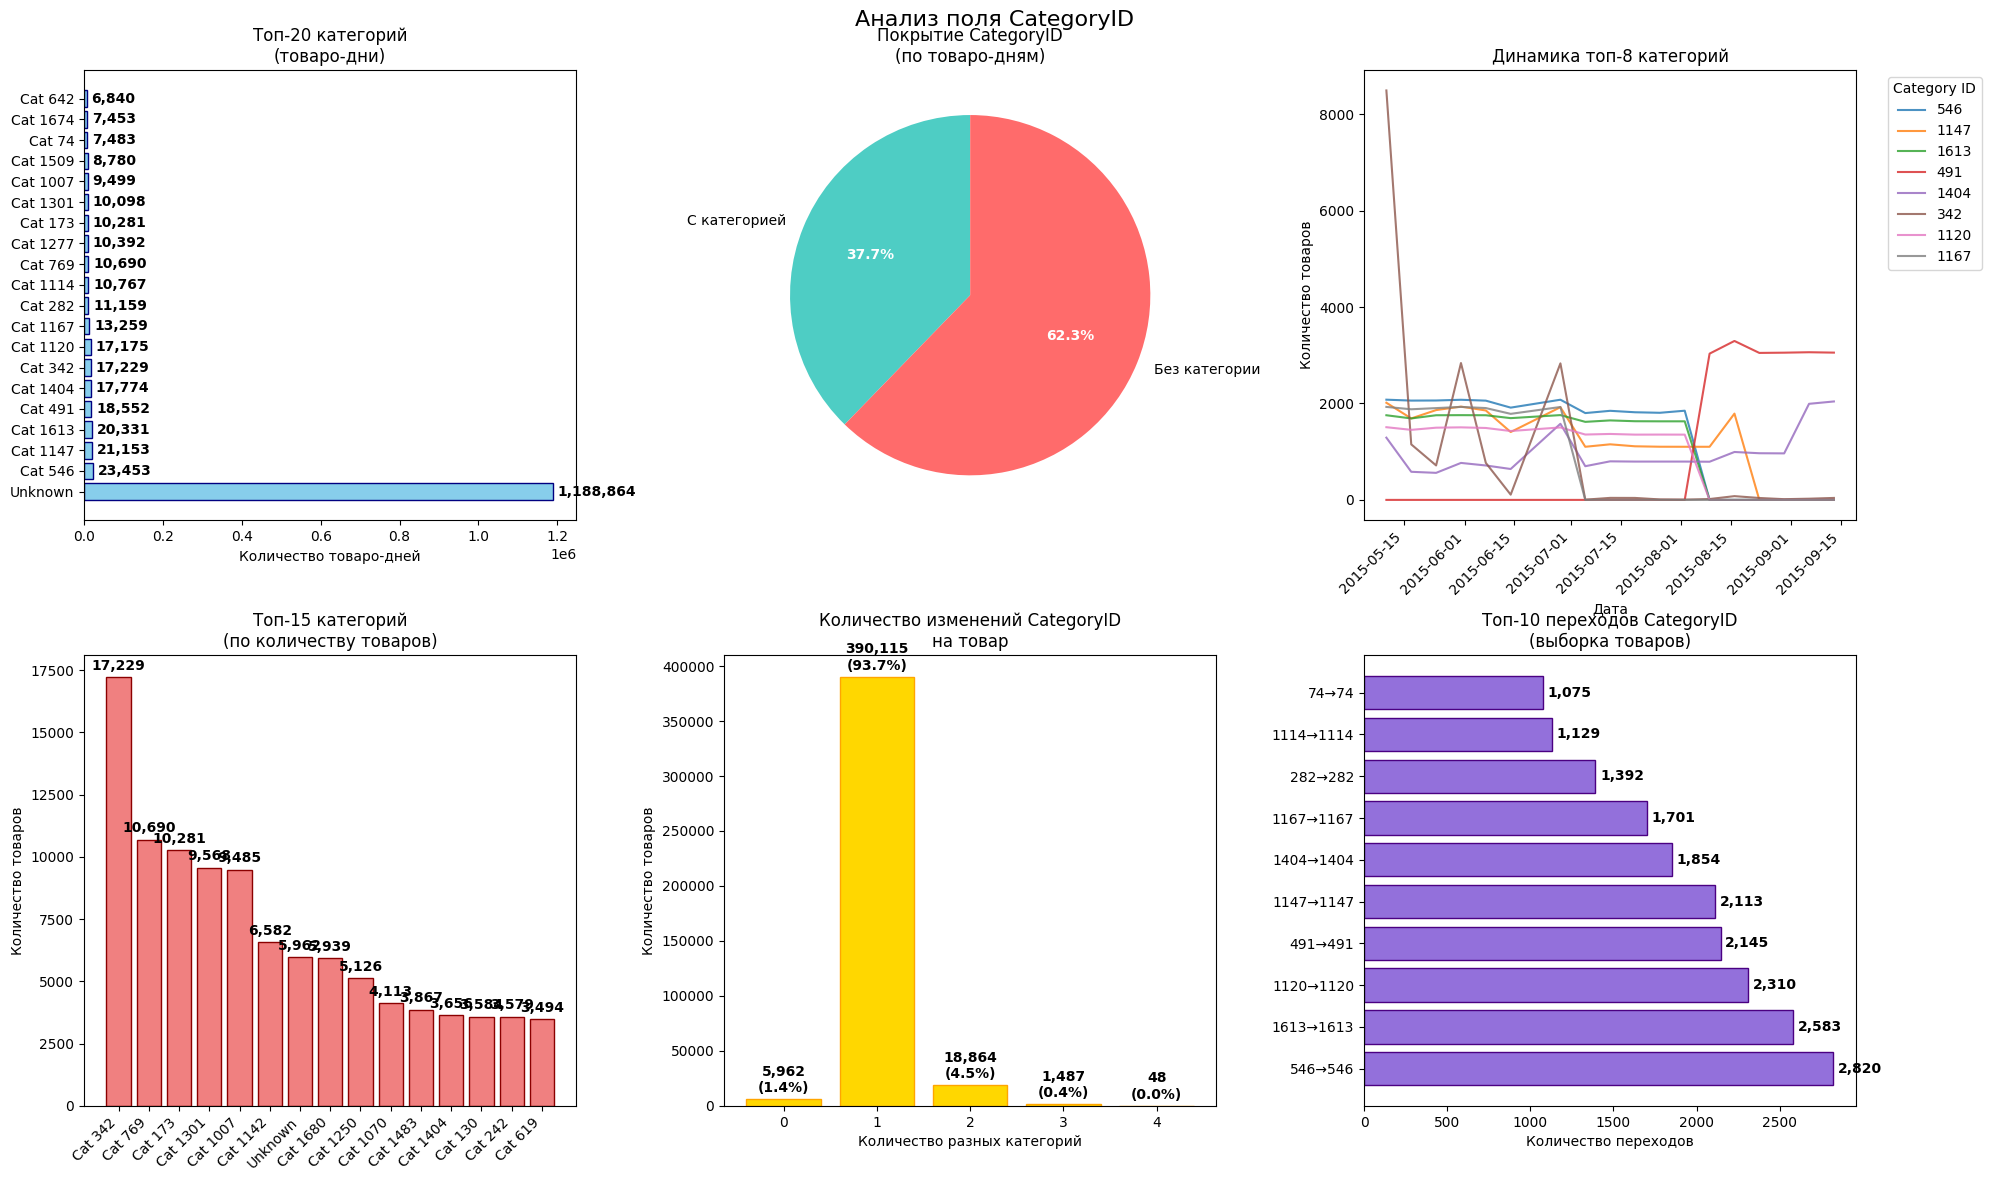

In [37]:
from EDA_utils import analyze_categoryid_field

stats, fig = analyze_categoryid_field(df_item_properties_all, df_category_tree)

In [38]:
pth = Path("EDA_res").resolve()
pth.mkdir(exist_ok=True)
f_name = f"item_props_category_{datetime.now().date().__str__()}"
fig.savefig(str(pth / (f_name + ".png")))

pd.DataFrame.from_dict(stats).to_json(pth / (f_name + ".json"))

Чо делаем с пропусками available и categoryid?

In [39]:
print(df_item_properties_all["categoryid"].isna().sum())

print(df_item_properties_all["available"].isna().sum())
print(df_item_properties_all.shape[0])

4015461
2005141
7430133


По тому, что я вижу, товар может сразу появиться с незаполненными categoryid и available. Прямой связи между этими полями я не вижу. Поэтому сначала дособираю датасет, а потом подумаю, как заполнить пропуски в этих фичах. ((

In [40]:
item_properties_cats_tree = pd.merge(
    left=df_item_properties_all,
    left_on=["categoryid"],
    right=df_category_tree,
    right_on=["categoryid"],
    how="left",
)

In [41]:
item_properties_cats_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430133 entries, 0 to 7430132
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   timestamp    int64  
 1   itemid       int32  
 2   property     float32
 3   available    object 
 4   categoryid   object 
 5   value_count  int64  
 6   value_first  float64
 7   value_last   float64
 8   value_min    float64
 9   value_max    float64
 10  value_mean   float64
 11  value_std    float64
 12  parentid     float64
dtypes: float32(1), float64(7), int32(1), int64(2), object(2)
memory usage: 680.2+ MB


In [42]:
item_properties_cats_tree

,timestamp,itemid,property,available,categoryid,value_count,value_first,value_last,value_min,value_max,value_mean,value_std,parentid
0,1431226800000,0,283.0,NaN,209,3,66094.0,478989.0,66094.0,478989.0,3.057857e+05,174997.322091,293.0
1,1431226800000,0,6.0,NaN,209,2,1152934.0,1238769.0,1152934.0,1238769.0,1.195852e+06,42917.500000,293.0
2,1431226800000,0,159.0,NaN,209,1,519769.0,519769.0,519769.0,519769.0,5.197690e+05,0.000000,293.0
3,1431226800000,0,678.0,NaN,209,1,372274.0,372274.0,372274.0,372274.0,3.722740e+05,0.000000,293.0
4,1431226800000,0,790.0,NaN,209,1,91200.0,91200.0,91200.0,91200.0,9.120000e+04,0.000000,293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7430128,1442113200000,466858,790.0,1,NaN,1,37200.0,37200.0,37200.0,37200.0,3.720000e+04,0.000000,NaN
7430129,1442113200000,466861,790.0,0,NaN,1,377520.0,377520.0,377520.0,377520.0,3.775200e+05,0.000000,NaN
7430130,1442113200000,466864,790.0,0,NaN,1,111840.0,111840.0,111840.0,111840.0,1.118400e+05,0.000000,NaN
7430131,1442113200000,466864,813.0,0,NaN,3,1148082.0,1262739.0,353870.0,1262739.0,9.215637e+05,404139.935577,NaN


In [43]:
df_category_tree.query("parentid == 293.0")

,categoryid,parentid
271,65,293
272,1445,293
290,1266,293
498,1560,293
1069,1066,293
1085,828,293
1557,1134,293
1612,209,293


In [44]:
df_category_tree.query("categoryid == 293.0")

,categoryid,parentid
270,293,1532


In [45]:
df_category_tree.query("categoryid == 1532")

,categoryid,parentid
1623,1532,-1


Множественное наследование  категории ((

In [46]:
def get_category_path_fixed_length(category_id, parent_dict, max_levels=10):
    path = []
    current = category_id
    visited = set()

    # Собираем путь от текущей категории к корню
    while current != -1 and current in parent_dict and len(path) < max_levels:
        if current in visited:
            break
        path.append(current)
        visited.add(current)
        current = parent_dict[current]

    if current != -1 and len(path) < max_levels:
        path.append(current)
    path = path[::-1]
    while len(path) < max_levels:
        path.append(-1)

    return path


def build_category_hierarchy(df_category_tree, max_levels=10):
    parent_dict = dict(
        zip(df_category_tree["categoryid"], df_category_tree["parentid"])
    )
    hierarchy_data = []

    for category_id in df_category_tree["categoryid"]:
        path = get_category_path_fixed_length(category_id, parent_dict, max_levels)
        row = {"categoryid": category_id}
        for i in range(max_levels):
            row[f"level_{i}"] = path[i]
        actual_depth = len([x for x in path if x != -1]) - 1
        root_category = path[0] if path[0] != -1 else category_id
        row.update(
            {
                "depth": actual_depth,
                "root_category": root_category,
                "is_root": actual_depth == 0,
                "path_length": len([x for x in path if x != -1]),
            }
        )
        hierarchy_data.append(row)

    hierarchy_df = pd.DataFrame(hierarchy_data)

    return hierarchy_df


df_hierarchy = build_category_hierarchy(df_category_tree, 6)

In [47]:
df_hierarchy

,categoryid,level_0,level_1,level_2,level_3,level_4,level_5,depth,root_category,is_root,path_length
0,1016,1532,1299,213,1016,-1,-1,3,1532,False,4
1,809,395,1257,169,809,-1,-1,3,395,False,4
2,570,653,351,9,570,-1,-1,3,653,False,4
3,1691,1579,885,1691,-1,-1,-1,2,1579,False,3
4,536,1579,885,1691,536,-1,-1,3,1579,False,4
...,...,...,...,...,...,...,...,...,...,...,...
1664,49,1532,113,1125,49,-1,-1,3,1532,False,4
1665,1112,679,630,1112,-1,-1,-1,2,679,False,3
1666,1336,140,540,745,1336,-1,-1,3,140,False,4
1667,689,1490,207,689,-1,-1,-1,2,1490,False,3


In [48]:
print(df_hierarchy["path_length"].max())
print(df_hierarchy["level_5"].nunique())

6
14


In [ ]:
item_properties_cats_tree = pd.merge(
    left=df_item_properties_all,
    right=df_hierarchy.drop(columns=["depth", "is_root", "path_length"]),
    left_on="categoryid",
    right_on="categoryid",
    how="left",
)

dataset_rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430133 entries, 0 to 7430132
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   itemid         int32  
 2   property       float32
 3   available      object 
 4   categoryid     object 
 5   value_count    int64  
 6   value_first    float64
 7   value_last     float64
 8   value_min      float64
 9   value_max      float64
 10  value_mean     float64
 11  value_std      float64
 12  level_0        float64
 13  level_1        float64
 14  level_2        float64
 15  level_3        float64
 16  level_4        float64
 17  level_5        float64
 18  root_category  float64
dtypes: float32(1), float64(13), int32(1), int64(2), object(2)
memory usage: 1020.4+ MB


In [50]:
for item in item_properties_cats_tree.columns:
    print(item, item_properties_cats_tree[item].isna().sum())

timestamp 0
itemid 0
property 0
available 2005141
categoryid 4015461
value_count 0
value_first 0
value_last 0
value_min 0
value_max 0
value_mean 0
value_std 0
level_0 4016394
level_1 4016394
level_2 4016394
level_3 4016394
level_4 4016394
level_5 4016394
root_category 4016394


In [51]:
item_properties_cats_tree.query("level_0.isna()")

,timestamp,itemid,property,available,categoryid,value_count,value_first,value_last,value_min,value_max,value_mean,value_std,level_0,level_1,level_2,level_3,level_4,level_5,root_category
17,1431226800000,3,678.0,0,NaN,1,327918.0,327918.0,327918.0,327918.0,3.279180e+05,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1431226800000,3,283.0,0,NaN,5,138228.0,261419.0,138228.0,1182824.0,4.121116e+05,391770.488305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1431226800000,3,888.0,0,NaN,1,261419.0,261419.0,261419.0,261419.0,2.614190e+05,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,1431226800000,3,764.0,0,NaN,1,1285872.0,1285872.0,1285872.0,1285872.0,1.285872e+06,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1431226800000,3,790.0,0,NaN,1,1560.0,1560.0,1560.0,1560.0,1.560000e+03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7430128,1442113200000,466858,790.0,1,NaN,1,37200.0,37200.0,37200.0,37200.0,3.720000e+04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7430129,1442113200000,466861,790.0,0,NaN,1,377520.0,377520.0,377520.0,377520.0,3.775200e+05,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7430130,1442113200000,466864,790.0,0,NaN,1,111840.0,111840.0,111840.0,111840.0,1.118400e+05,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7430131,1442113200000,466864,813.0,0,NaN,3,1148082.0,1262739.0,353870.0,1262739.0,9.215637e+05,404139.935577,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
for item in [
    "level_0",
    "level_1",
    "level_2",
    "level_3",
    "level_4",
    "level_5",
    "root_category",
]:
    item_properties_cats_tree[item] = item_properties_cats_tree[item].fillna(value=-1)

In [66]:
item_properties_cats_tree.to_parquet("data/item_properties_cats_tree.parquet")

df_hierarchy.to_parquet("data/hierarchy_category.parquet")

In [1]:
import pandas as pd

item_properties_cats_tree = pd.read_parquet("data/item_properties_cats_tree.parquet")

df_events = pd.read_csv("data/events.csv")

In [2]:
dataset_rw = pd.merge(
    left=df_events,
    right=item_properties_cats_tree,
    left_on="itemid",
    right_on="itemid",
    how="inner",
)

dataset_rw

,timestamp_x,visitorid,event,itemid,transactionid,timestamp_y,property,available,categoryid,value_count,...,value_max,value_mean,value_std,level_0,level_1,level_2,level_3,level_4,level_5,root_category
0,1433221332117,257597,view,355908,NaN,1431226800000,112.0,1.0,1173.0,1,...,679677.0,679677.000000,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
1,1433221332117,257597,view,355908,NaN,1431226800000,790.0,1.0,1173.0,1,...,94080.0,94080.000000,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
2,1433221332117,257597,view,355908,NaN,1431226800000,888.0,1.0,1173.0,1,...,264157.0,264157.000000,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
3,1433221332117,257597,view,355908,NaN,1431226800000,283.0,1.0,1173.0,4,...,812080.0,494165.250000,208005.784696,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
4,1433221332117,257597,view,355908,NaN,1431226800000,227.0,1.0,1173.0,2,...,812080.0,547543.000000,264537.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92335068,1438400163914,199536,view,152913,NaN,1431226800000,159.0,0.0,469.0,1,...,519769.0,519769.000000,0.000000,140.0,409.0,1383.0,469.0,-1.0,-1.0,140.0
92335069,1438400163914,199536,view,152913,NaN,1431226800000,112.0,0.0,469.0,1,...,679677.0,679677.000000,0.000000,140.0,409.0,1383.0,469.0,-1.0,-1.0,140.0
92335070,1438400163914,199536,view,152913,NaN,1431226800000,283.0,0.0,469.0,33,...,1308676.0,499721.242424,411804.208044,140.0,409.0,1383.0,469.0,-1.0,-1.0,140.0
92335071,1438400163914,199536,view,152913,NaN,1431226800000,364.0,0.0,469.0,1,...,916048.0,916048.000000,0.000000,140.0,409.0,1383.0,469.0,-1.0,-1.0,140.0


In [4]:
dataset_rw.drop(dataset_rw.query("timestamp_x < timestamp_y").index, inplace=True)

In [5]:
dataset_rw

,timestamp_x,visitorid,event,itemid,transactionid,timestamp_y,property,available,categoryid,value_count,...,value_max,value_mean,value_std,level_0,level_1,level_2,level_3,level_4,level_5,root_category
0,1433221332117,257597,view,355908,NaN,1431226800000,112.0,1.0,1173.0,1,...,679677.0,679677.000000,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
1,1433221332117,257597,view,355908,NaN,1431226800000,790.0,1.0,1173.0,1,...,94080.0,94080.000000,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
2,1433221332117,257597,view,355908,NaN,1431226800000,888.0,1.0,1173.0,1,...,264157.0,264157.000000,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
3,1433221332117,257597,view,355908,NaN,1431226800000,283.0,1.0,1173.0,4,...,812080.0,494165.250000,208005.784696,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
4,1433221332117,257597,view,355908,NaN,1431226800000,227.0,1.0,1173.0,2,...,812080.0,547543.000000,264537.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92335068,1438400163914,199536,view,152913,NaN,1431226800000,159.0,0.0,469.0,1,...,519769.0,519769.000000,0.000000,140.0,409.0,1383.0,469.0,-1.0,-1.0,140.0
92335069,1438400163914,199536,view,152913,NaN,1431226800000,112.0,0.0,469.0,1,...,679677.0,679677.000000,0.000000,140.0,409.0,1383.0,469.0,-1.0,-1.0,140.0
92335070,1438400163914,199536,view,152913,NaN,1431226800000,283.0,0.0,469.0,33,...,1308676.0,499721.242424,411804.208044,140.0,409.0,1383.0,469.0,-1.0,-1.0,140.0
92335071,1438400163914,199536,view,152913,NaN,1431226800000,364.0,0.0,469.0,1,...,916048.0,916048.000000,0.000000,140.0,409.0,1383.0,469.0,-1.0,-1.0,140.0


In [6]:
dataset_rw["event"].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [7]:
dataset_rw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53377247 entries, 0 to 92335072
Data columns (total 23 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp_x    int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
 5   timestamp_y    int64  
 6   property       float32
 7   available      float64
 8   categoryid     float64
 9   value_count    int64  
 10  value_first    float64
 11  value_last     float64
 12  value_min      float64
 13  value_max      float64
 14  value_mean     float64
 15  value_std      float64
 16  level_0        float64
 17  level_1        float64
 18  level_2        float64
 19  level_3        float64
 20  level_4        float64
 21  level_5        float64
 22  root_category  float64
dtypes: float32(1), float64(16), int64(5), object(1)
memory usage: 9.3+ GB


In [8]:
dataset_rw.query("event == 'transaction' and transactionid.isna() ")

,timestamp_x,visitorid,event,itemid,transactionid,timestamp_y,property,available,categoryid,value_count,...,value_max,value_mean,value_std,level_0,level_1,level_2,level_3,level_4,level_5,root_category


In [9]:
without_dropped_columns = [
    item for item in dataset_rw.columns.to_list() if item != "transactionid"
]

dataset_rw_2 = dataset_rw[without_dropped_columns].copy(deep=bool)

In [10]:
del dataset_rw

dataset_rw_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53377247 entries, 0 to 92335072
Data columns (total 22 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp_x    int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   timestamp_y    int64  
 5   property       float32
 6   available      float64
 7   categoryid     float64
 8   value_count    int64  
 9   value_first    float64
 10  value_last     float64
 11  value_min      float64
 12  value_max      float64
 13  value_mean     float64
 14  value_std      float64
 15  level_0        float64
 16  level_1        float64
 17  level_2        float64
 18  level_3        float64
 19  level_4        float64
 20  level_5        float64
 21  root_category  float64
dtypes: float32(1), float64(15), int64(5), object(1)
memory usage: 8.9+ GB


In [11]:
dataset_rw_2.to_parquet("data/raw_dataset.parquet")

## Part2

In [1]:
import pandas as pd


dataset_rw = pd.read_parquet("data/raw_dataset.parquet")
hierarchy = pd.read_parquet("data/hierarchy_category.parquet")

In [2]:
dataset_rw.head()

,timestamp_x,visitorid,event,itemid,timestamp_y,property,available,categoryid,value_count,value_first,...,value_max,value_mean,value_std,level_0,level_1,level_2,level_3,level_4,level_5,root_category
0,1433221332117,257597,view,355908,1431226800000,112.0,1.0,1173.0,1,679677.0,...,679677.0,679677.00,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
1,1433221332117,257597,view,355908,1431226800000,790.0,1.0,1173.0,1,94080.0,...,94080.0,94080.00,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
2,1433221332117,257597,view,355908,1431226800000,888.0,1.0,1173.0,1,264157.0,...,264157.0,264157.00,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
3,1433221332117,257597,view,355908,1431226800000,283.0,1.0,1173.0,4,812080.0,...,812080.0,494165.25,208005.784696,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0
4,1433221332117,257597,view,355908,1431226800000,227.0,1.0,1173.0,2,283006.0,...,812080.0,547543.00,264537.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0


In [4]:
dataset_rw["timestamp_x_datetime"] = pd.to_datetime(
    dataset_rw["timestamp_x"], unit="ms"
)

dataset_rw["timestamp_y_datetime"] = pd.to_datetime(
    dataset_rw["timestamp_y"], unit="ms"
)

In [5]:
dataset_rw.head()

,timestamp_x,visitorid,event,itemid,timestamp_y,property,available,categoryid,value_count,value_first,...,value_std,level_0,level_1,level_2,level_3,level_4,level_5,root_category,timestamp_x_datetime,timestamp_y_datetime
0,1433221332117,257597,view,355908,1431226800000,112.0,1.0,1173.0,1,679677.0,...,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0,2015-06-02 05:02:12.117,2015-05-10 03:00:00
1,1433221332117,257597,view,355908,1431226800000,790.0,1.0,1173.0,1,94080.0,...,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0,2015-06-02 05:02:12.117,2015-05-10 03:00:00
2,1433221332117,257597,view,355908,1431226800000,888.0,1.0,1173.0,1,264157.0,...,0.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0,2015-06-02 05:02:12.117,2015-05-10 03:00:00
3,1433221332117,257597,view,355908,1431226800000,283.0,1.0,1173.0,4,812080.0,...,208005.784696,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0,2015-06-02 05:02:12.117,2015-05-10 03:00:00
4,1433221332117,257597,view,355908,1431226800000,227.0,1.0,1173.0,2,283006.0,...,264537.000000,140.0,384.0,805.0,1173.0,-1.0,-1.0,140.0,2015-06-02 05:02:12.117,2015-05-10 03:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


colors = ["#ff6b6b", "#4ecdc4", "#95a5a6"]

/tmp/ipykernel_13083/1349628604.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset_rw, x="event", order=dataset_rw["event"].value_counts().index,palette=colors)


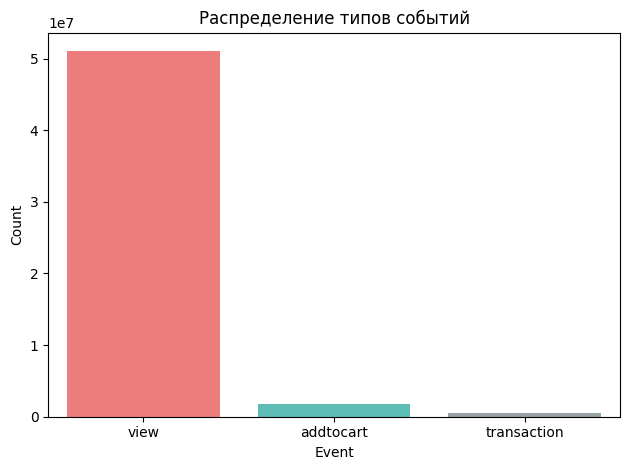

In [ ]:
plt.figure()
sns.countplot(
    data=dataset_rw,
    x="event",
    order=dataset_rw["event"].value_counts().index,
    palette=colors,
)
plt.title("Распределение типов событий")
plt.xlabel("Event")
plt.ylabel("Count")
plt.tight_layout()

Просмотры многокртно превышают действия по добавлению в корзину и 

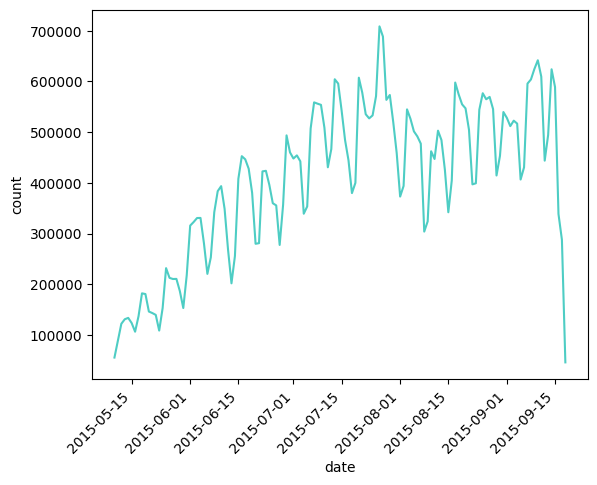

In [ ]:
events_per_day = (
    dataset_rw.groupby(dataset_rw["timestamp_x_datetime"].dt.date)
    .size()
    .rename("count")
    .reset_index()
    .rename(columns={"timestamp_x_datetime": "date"})
)

plt.figure()
sns.lineplot(data=events_per_day, x="date", y="count", color=colors[1])
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha("right")

Наблюдается некоторая сезонность интереса пользователей к товарам

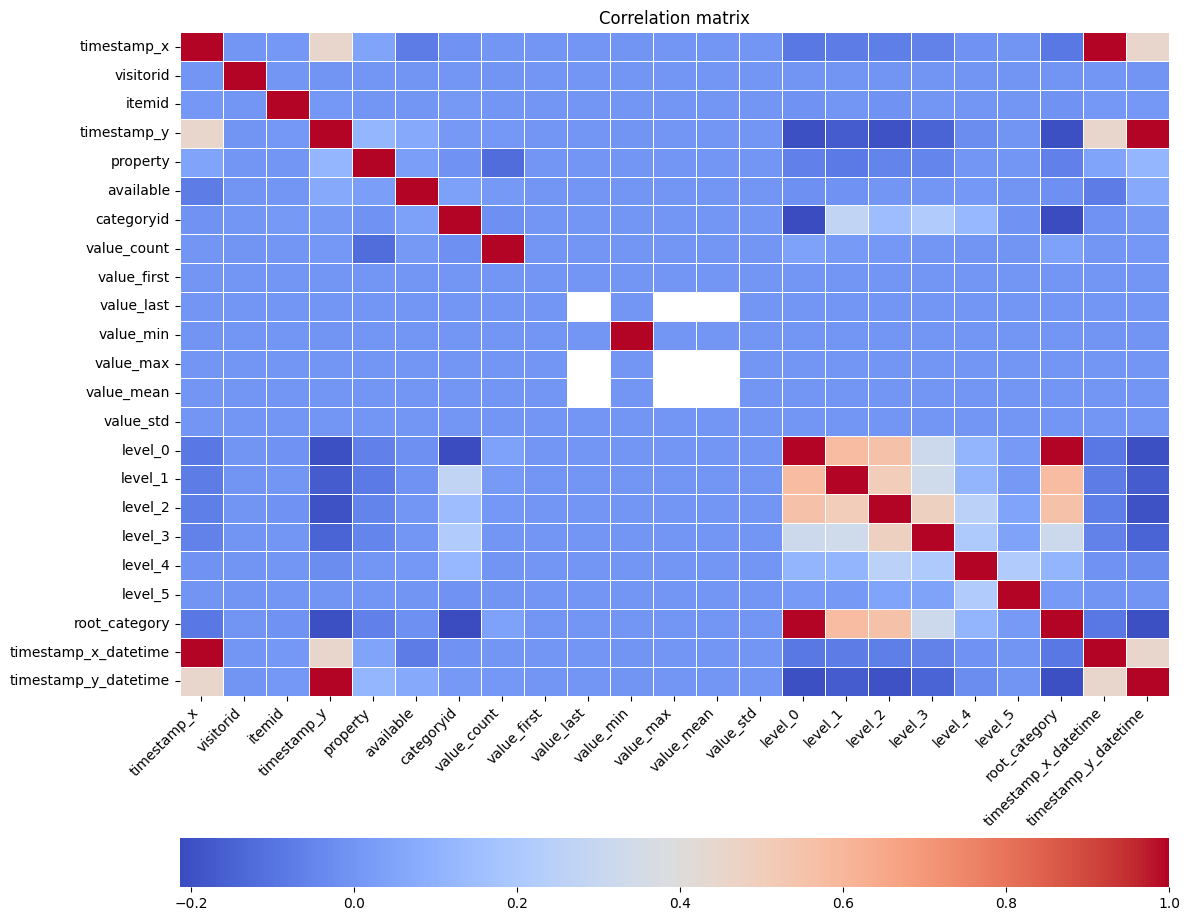

In [13]:
numeric_cols = dataset_rw.select_dtypes(include=["number"]).columns
numeric_cols = numeric_cols.tolist() + ["timestamp_x_datetime", "timestamp_y_datetime"]

corr = dataset_rw[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    linewidths=0.5,
    annot=False,
    cbar_kws={"orientation": "horizontal"},
)
plt.title("Correlation matrix")
plt.tight_layout()

for tick in plt.gca().get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha("right")

/tmp/ipykernel_13083/2742458181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


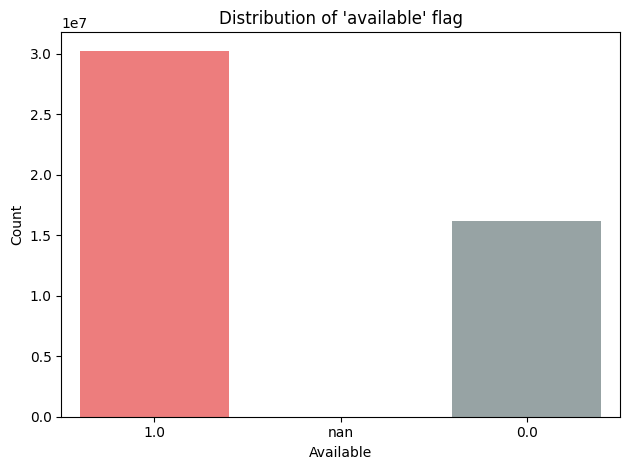

In [ ]:
plt.figure()
sns.countplot(
    data=dataset_rw,
    x="available",
    order=sorted(dataset_rw["available"].unique()),
    palette=colors,  # <- палитра
)
plt.title("Distribution of 'available' flag")
plt.xlabel("Available")
plt.ylabel("Count")
plt.tight_layout()

/tmp/ipykernel_865/4076798799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_865/4076798799.py:3: UserWarning: 
The palette list has fewer values (3) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


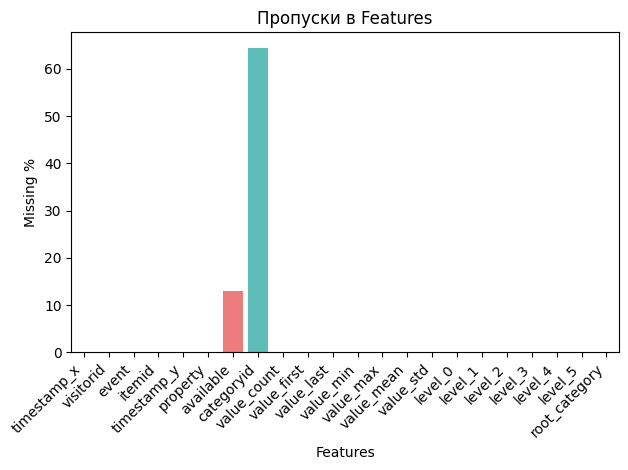

In [7]:
missing_pct = dataset_rw.isna().mean() * 100
plt.figure()
sns.barplot(
    x=missing_pct.index,
    y=missing_pct.values,
    palette=colors,  # <- палитра
)
plt.title("Пропуски в Features")
plt.ylabel("Missing %")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

/tmp/ipykernel_13083/1625130876.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


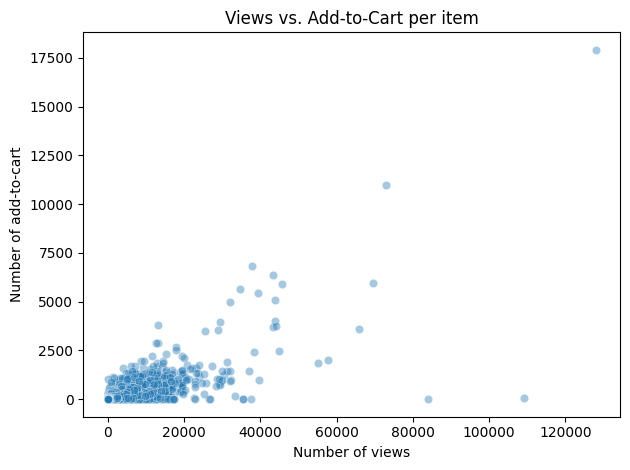

In [ ]:
view_counts = (
    dataset_rw[dataset_rw["event"] == "view"].groupby("itemid").size().rename("views")
)
cart_counts = (
    dataset_rw[dataset_rw["event"].isin(["addtocart", "transaction"])]
    .groupby("itemid")
    .size()
    .rename("carts")
)
agg = pd.DataFrame({"views": view_counts, "carts": cart_counts}).fillna(0)

plt.figure()
sns.scatterplot(data=agg, x="views", y="carts", alpha=0.4, hue=None, palette=colors)
plt.title("Views vs. Add‑to‑Cart per item")
plt.xlabel("Number of views")
plt.ylabel("Number of add‑to‑cart")
plt.tight_layout()

# Выводы:

- Распределение событий: ожидаемо доминируют просмотры; добавления в корзину и покупки существенно реже.
- Временной профиль: суточная агрегация показывает вариативность активности по дням.
- Корреляции: выраженные корреляции внутри группы агрегатов по свойствам (value_min/max/mean/std), заметных неожиданных линейных связей с целевыми событиями на этом этапе не выявлено.
- Доступность товара: флаг available имеет дисбаланс (больше значений “доступен”).
- Пропуски: в ряде признаков присутствуют пропуски (визуализированы), учтены при подготовке.
- Товарный уровень: между количеством просмотров и добавлений в корзину есть положительная, но нелинейная связь; много товаров с высоким числом просмотров и нулевыми добавлениями, что указывает на различия в привлекательности/релевантности.
